In [1]:
# Creating a directory and copying the 'kaggle.json' file to the appropriate location.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
# Downloading the 'dogs-vs-cats' dataset using the Kaggle CLI.
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [12]:
# Extracting contents from a zip file using the zipfile module.
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
# Importing TensorFlow and Keras, defining a Sequential model with various layers.
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [25]:
# Generators
# Creating an image dataset from a directory with specified parameters using TensorFlow and Keras.

train_ds = keras.utils.image_dataset_from_directory(directory='/content/train', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(directory='/content/test', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(256, 256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
# Normalization
# Performing image preprocessing and mapping a processing function to the training and validation datasets.

def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Create CNN Model

In [28]:
# Refer VGG16 model
# Creating a Sequential model with multiple convolutional and pooling layers following the VGG16 architecture.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Adding a Flatten layer to the model
model.add(Flatten())

# Adding Dense layers with specified activation functions (relu and sigmoid) and Dropout layers to the model.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# View Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [29]:
# Compiling the model with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_ds, validation_data=validation_ds, batch_size=32, epochs=10)

Epoch 1/10
625/625 [==============================] - 84s 110ms/step - loss: 1.0150 - accuracy: 0.5954 - val_loss: 0.6854 - val_accuracy: 0.5922
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5533 - accuracy: 0.7151 - val_loss: 0.5896 - val_accuracy: 0.7188
Epoch 3/10
625/625 [==============================] - 71s 112ms/step - loss: 0.4640 - accuracy: 0.7771 - val_loss: 0.5477 - val_accuracy: 0.7154
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4002 - accuracy: 0.8176 - val_loss: 0.4107 - val_accuracy: 0.8182
Epoch 5/10
625/625 [==============================] - 71s 112ms/step - loss: 0.3331 - accuracy: 0.8508 - val_loss: 0.5583 - val_accuracy: 0.7580
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.2735 - accuracy: 0.8782 - val_loss: 0.2797 - val_accuracy: 0.8840
Epoch 7/10
625/625 [==============================] - 69s 111ms/step - loss: 0.2217 - accuracy: 0.9079 - val_loss: 0.3277 - val_ac

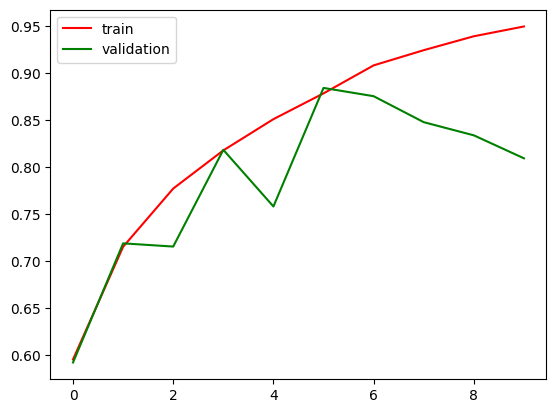

In [32]:
# Plotting the training and validation accuracy over epochs using Matplotlib.

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

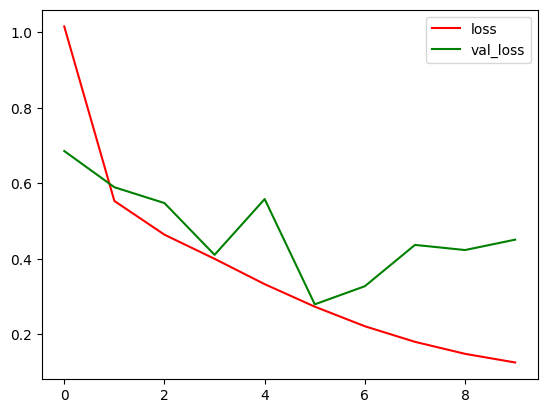

In [34]:
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
plt.legend()
plt.show()

Overall, the model performed well, achieving high accuracy on both the training and validation datasets. The decrease in loss and improvement in accuracy over the epochs suggest that the model learned to generalize and make accurate predictions on new data. This outcome indicates that the model is suitable for the given task and has successfully learned the patterns and features necessary for classifying the images in the dataset.






In [52]:
import cv2

In [57]:
test_img = cv2.imread('/content/dog.jpg')

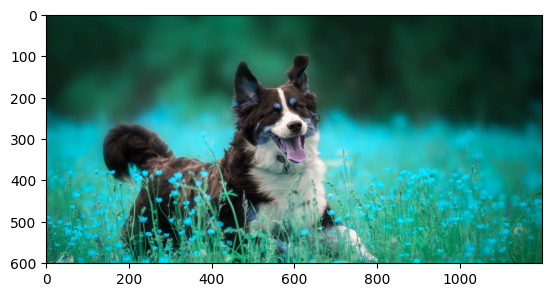

In [58]:
plt.imshow(test_img)

In [59]:
test_img.shape

(601, 1200, 3)

In [60]:
test_img = cv2.resize(test_img, (256,256))

In [61]:
test_input = test_img.reshape((1, 256,256,3))

In [62]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[8.108361e-05]], dtype=float32)